In [1]:
import logging
import os
from PIL import Image
import six

from torch.utils.data import DataLoader

import lmdb
from tqdm.auto import tqdm
import pyarrow as pa
import lz4framed

import torch.utils.data as data


In [2]:
from cassava.lmdb_dataset import *

In [3]:
train_images_lmdb = context.catalog.load('train_images_lmdb')

2020-12-10 17:36:33,738 - kedro.io.data_catalog - INFO - Loading data from `train_images_lmdb` (KedroImageLMDBDataSet)...


In [4]:
train_images_lmdb[0]

(<PIL.Image.Image image mode=RGB size=400x400 at 0x7FC950125B80>, 0)

In [5]:
len(train_images_lmdb.keys) == train_images_lmdb.length

True

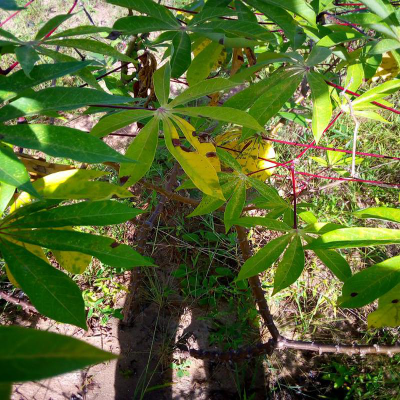

In [13]:
train_images_lmdb[0][0]